In [85]:
import joblib
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from aging.organization.paths import ValidationPaths
from aging.size_norm.validation import compute_areas

In [2]:
val_paths = ValidationPaths()

In [3]:
df = pl.read_csv("/n/groups/datta/win/longtogeny/size_norm/models/bottleneck_optimization_00/models.csv")

In [4]:
df = df.filter(pl.col("stage") == "stage_05").sort(by=["arch", "curriculum_learning", "fft_branch"])

In [5]:
df

stage,uuid,arch,fft_branch,bottleneck,channels,curriculum_learning,file
str,str,str,bool,i64,i64,bool,str
"""stage_05""","""30e86477-76ad-…","""ae""",false,25,128,false,"""/n/groups/datt…"
"""stage_05""","""0d6e9634-b8d2-…","""ae""",true,25,128,false,"""/n/groups/datt…"
"""stage_05""","""a043f8c0-d675-…","""ae""",false,25,128,true,"""/n/groups/datt…"
"""stage_05""","""4c8fc0b1-8514-…","""ae""",true,25,128,true,"""/n/groups/datt…"
"""stage_05""","""6f0d9a78-606e-…","""vae""",false,25,128,false,"""/n/groups/datt…"
"""stage_05""","""c7988d0a-9185-…","""vae""",true,25,128,false,"""/n/groups/datt…"
"""stage_05""","""8b6bc1ee-bfb6-…","""vae""",false,25,128,true,"""/n/groups/datt…"
"""stage_05""","""625cd119-dba6-…","""vae""",true,25,128,true,"""/n/groups/datt…"


In [6]:
# ae, false, true
df[2]

stage,uuid,arch,fft_branch,bottleneck,channels,curriculum_learning,file
str,str,str,bool,i64,i64,bool,str
"""stage_05""","""a043f8c0-d675-…","""ae""",false,25,128,true,"""/n/groups/datt…"


In [7]:
ae_mdl = Path(df['file'][2])

In [8]:
ae_pose_path = ae_mdl.parent / "age_classifier/transformed_age_classifier_poses.p.gz"

In [9]:
# vae, false, true
df[6]

stage,uuid,arch,fft_branch,bottleneck,channels,curriculum_learning,file
str,str,str,bool,i64,i64,bool,str
"""stage_05""","""8b6bc1ee-bfb6-…","""vae""",false,25,128,true,"""/n/groups/datt…"


In [10]:
vae_mdl = Path(df['file'][6])

In [11]:
vae_pose_path = vae_mdl.parent / "age_classifier/transformed_age_classifier_poses.p.gz"

In [12]:
pre_xform_poses = joblib.load(val_paths.age_classifier)

In [13]:
vae_poses = joblib.load(vae_pose_path)


In [41]:

ae_poses = joblib.load(ae_pose_path)

In [14]:
list(vae_poses)[:5]

[(3,
  PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Dana_ontogeny/Males/3wks_02112021/session_20211029101832/proc/results_00.h5')),
 (3,
  PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Dana_ontogeny/Males/3wks_02112021/session_20211029114521/proc/results_00.h5')),
 (3,
  PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Dana_ontogeny/Males/3wks_02112021/session_20230605130947/proc/results_00.h5')),
 (3,
  PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Dana_ontogeny/Males/3wks_02112021/session_20230605131002/proc/results_00.h5')),
 (3,
  PosixPath('/n/groups/datta/Dana/Ontogeny/raw_data/Dana_ontogeny/Males/3wks_02112021/session_20230605131018/proc/results_00.h5'))]

In [42]:
pre_xform = compute_areas(pre_xform_poses)
post_vae_xform = compute_areas(vae_poses)
post_ae_xform = compute_areas(ae_poses)

In [43]:
x = pd.Series(pre_xform)
y = pd.Series(post_vae_xform)
y2 = pd.Series(post_ae_xform)

size_df = pd.DataFrame({"pre_xform": x, "post_vae_xform": y, "post_ae_xform": y2})
size_df.index.names = ["age", "file"]
size_df = size_df.reset_index()

In [76]:
size_df.std(numeric_only=True)

age                29.272877
pre_xform         128.247540
post_vae_xform     13.049886
post_ae_xform      14.290358
dtype: float64

In [77]:
size_df.query('age > 3').std(numeric_only=True)

age                28.806315
pre_xform         114.961596
post_vae_xform     12.834940
post_ae_xform      14.070697
dtype: float64

In [44]:
size_df

,age,file,pre_xform,post_vae_xform,post_ae_xform
0,3,/n/groups/datta/Dana/Ontogeny/raw_data/Dana_on...,331.0,555.0,567.0
1,3,/n/groups/datta/Dana/Ontogeny/raw_data/Dana_on...,336.0,552.0,561.0
2,3,/n/groups/datta/Dana/Ontogeny/raw_data/Dana_on...,308.0,544.0,552.0
3,3,/n/groups/datta/Dana/Ontogeny/raw_data/Dana_on...,322.0,564.0,581.0
4,3,/n/groups/datta/Dana/Ontogeny/raw_data/Dana_on...,412.0,563.0,581.0
...,...,...,...,...,...
135,103,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,826.0,564.0,574.0
136,103,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,712.0,570.0,581.0
137,103,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,845.0,548.0,556.0
138,103,/n/groups/datta/Dana/Ontogeny/raw_data/Ontogen...,770.0,513.0,516.0


In [48]:
size_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr().iloc[1:, 0]

post_vae_xform    0.028184
post_ae_xform    -0.012507
Name: pre_xform, dtype: float64

In [49]:
size_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr(method="spearman").iloc[1:, 0]

post_vae_xform    0.002198
post_ae_xform    -0.031673
Name: pre_xform, dtype: float64

<Axes: xlabel='pre_xform', ylabel='post_vae_xform'>

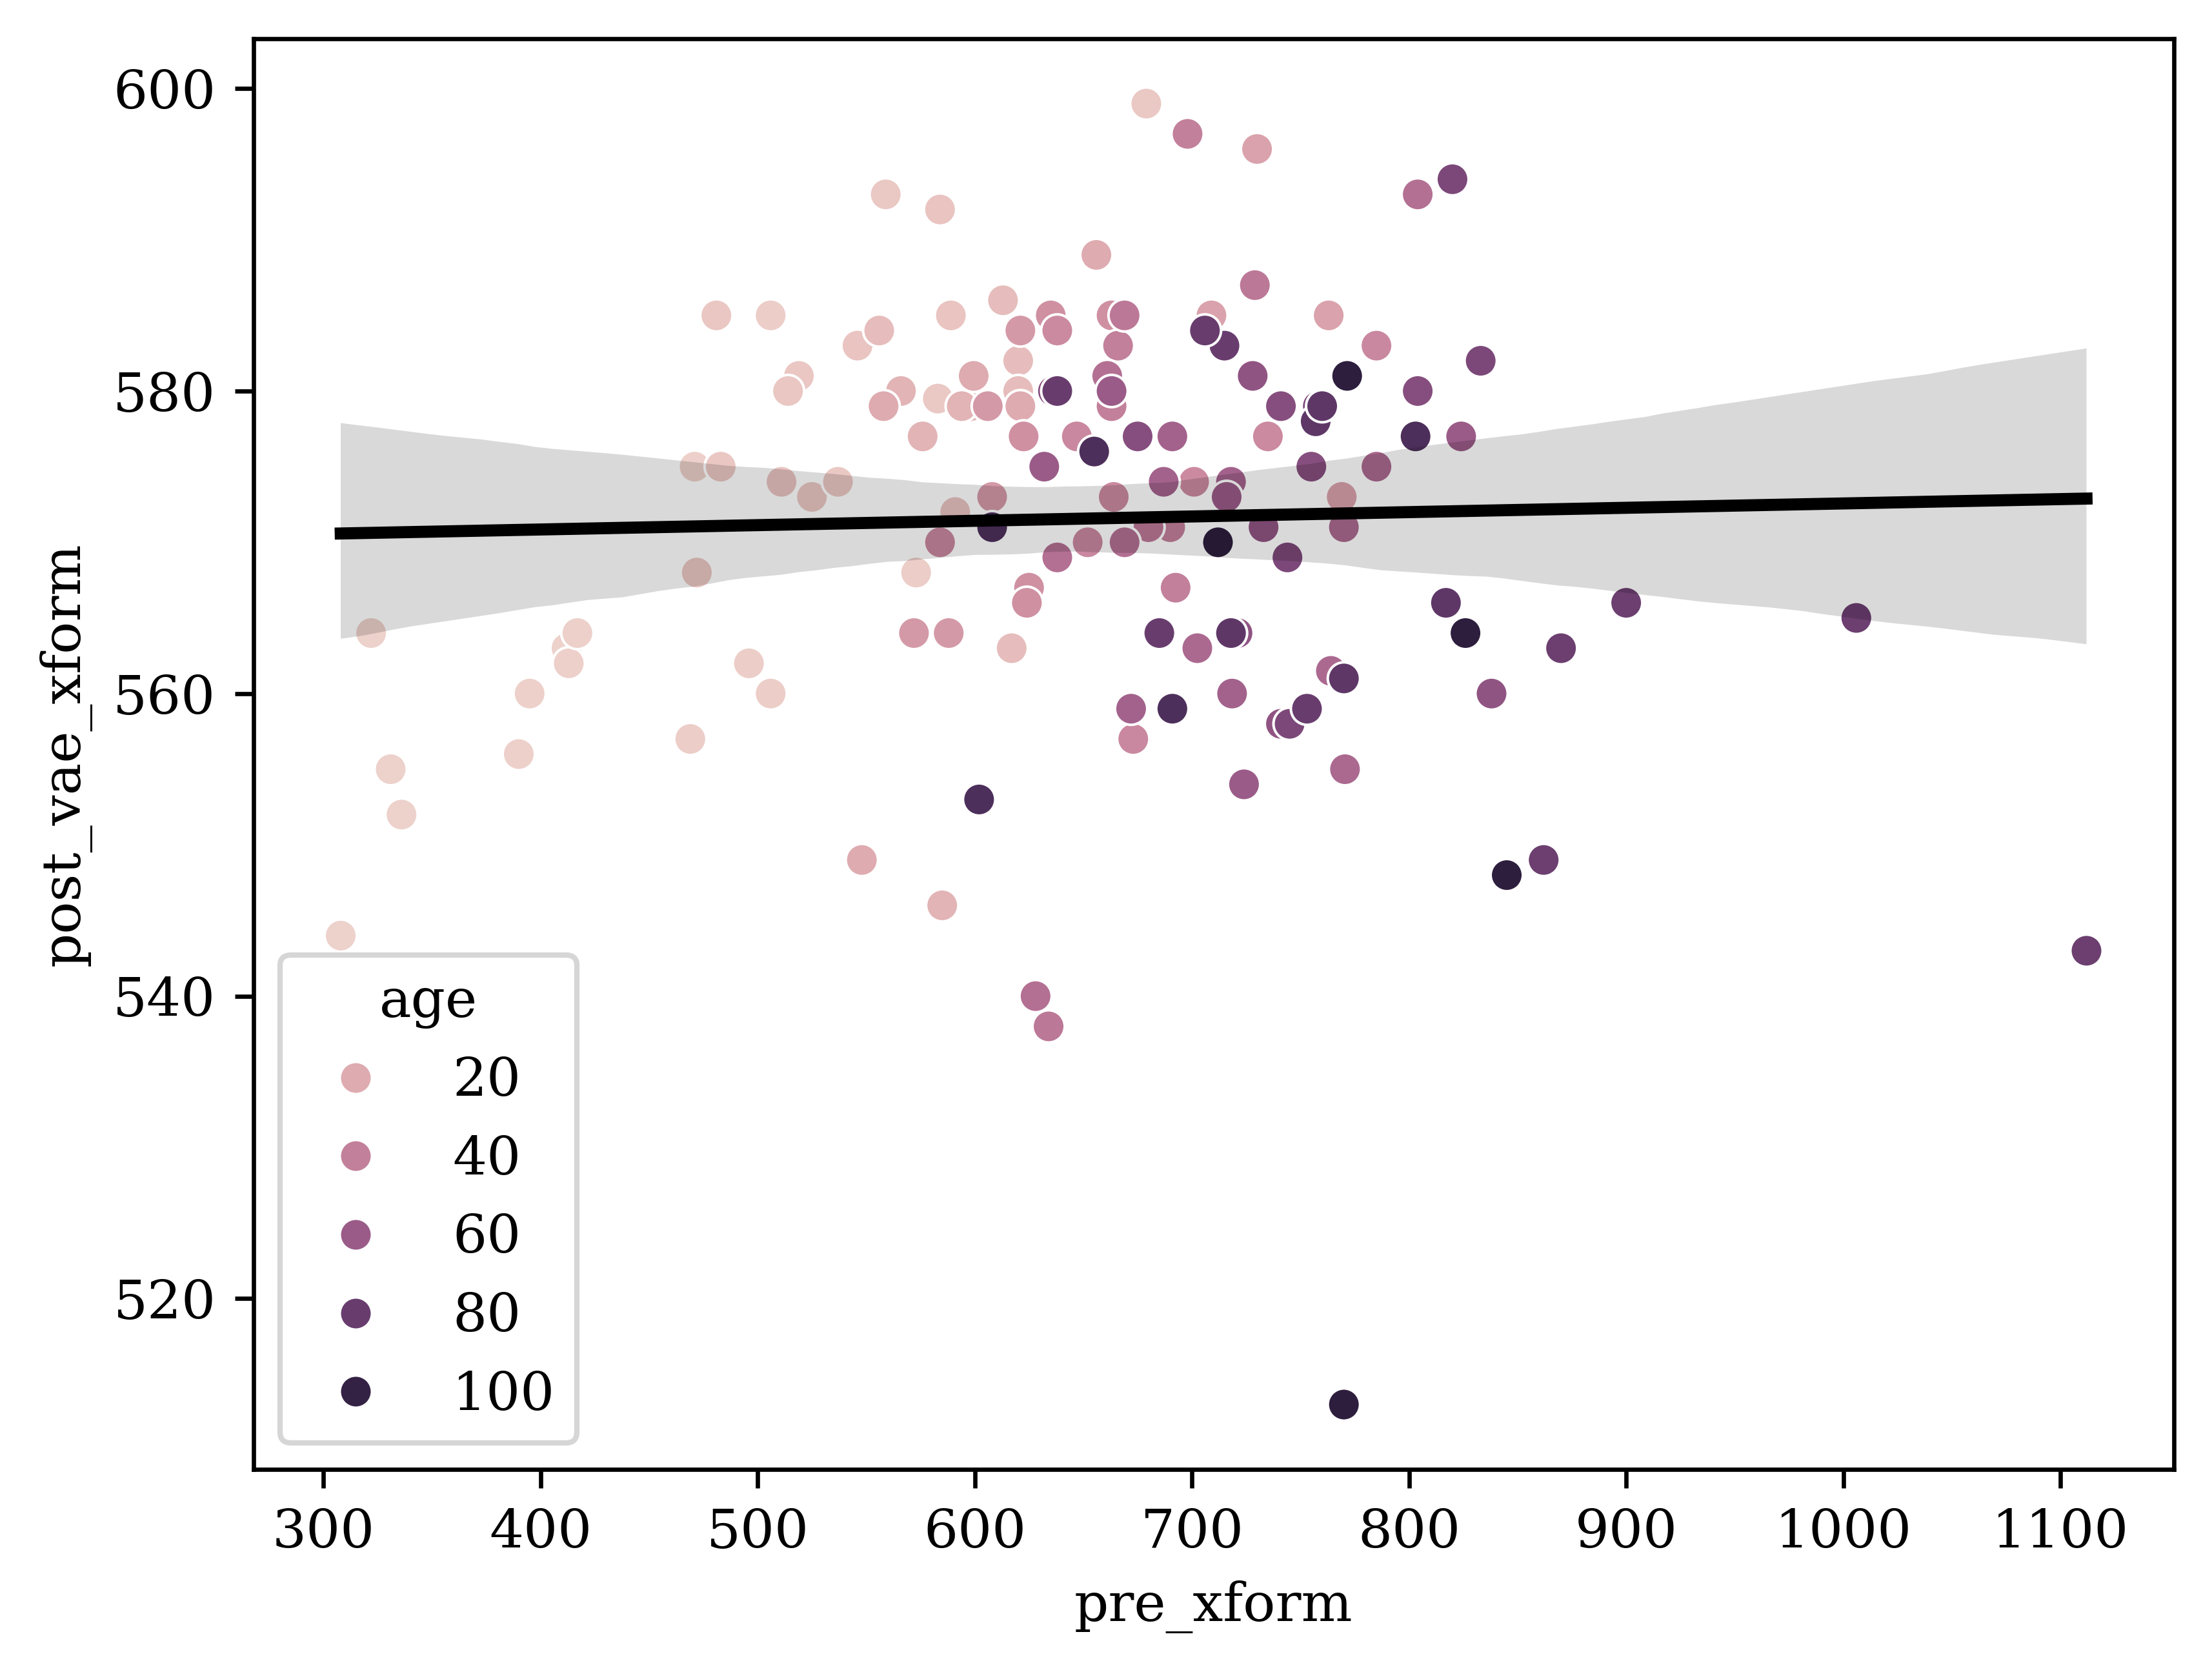

In [51]:
sns.scatterplot(data=size_df, x="pre_xform", y="post_vae_xform", hue="age")
sns.regplot(data=size_df, x="pre_xform", y="post_vae_xform", scatter=False, color='k')

In [59]:
filt_df = size_df.query('age > 3')

In [53]:
filt_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr().iloc[1:, 0]

post_vae_xform   -0.101986
post_ae_xform    -0.135029
Name: pre_xform, dtype: float64

In [54]:
filt_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr(method="spearman").iloc[1:, 0]

post_vae_xform   -0.081338
post_ae_xform    -0.105734
Name: pre_xform, dtype: float64

<Axes: xlabel='pre_xform', ylabel='post_vae_xform'>

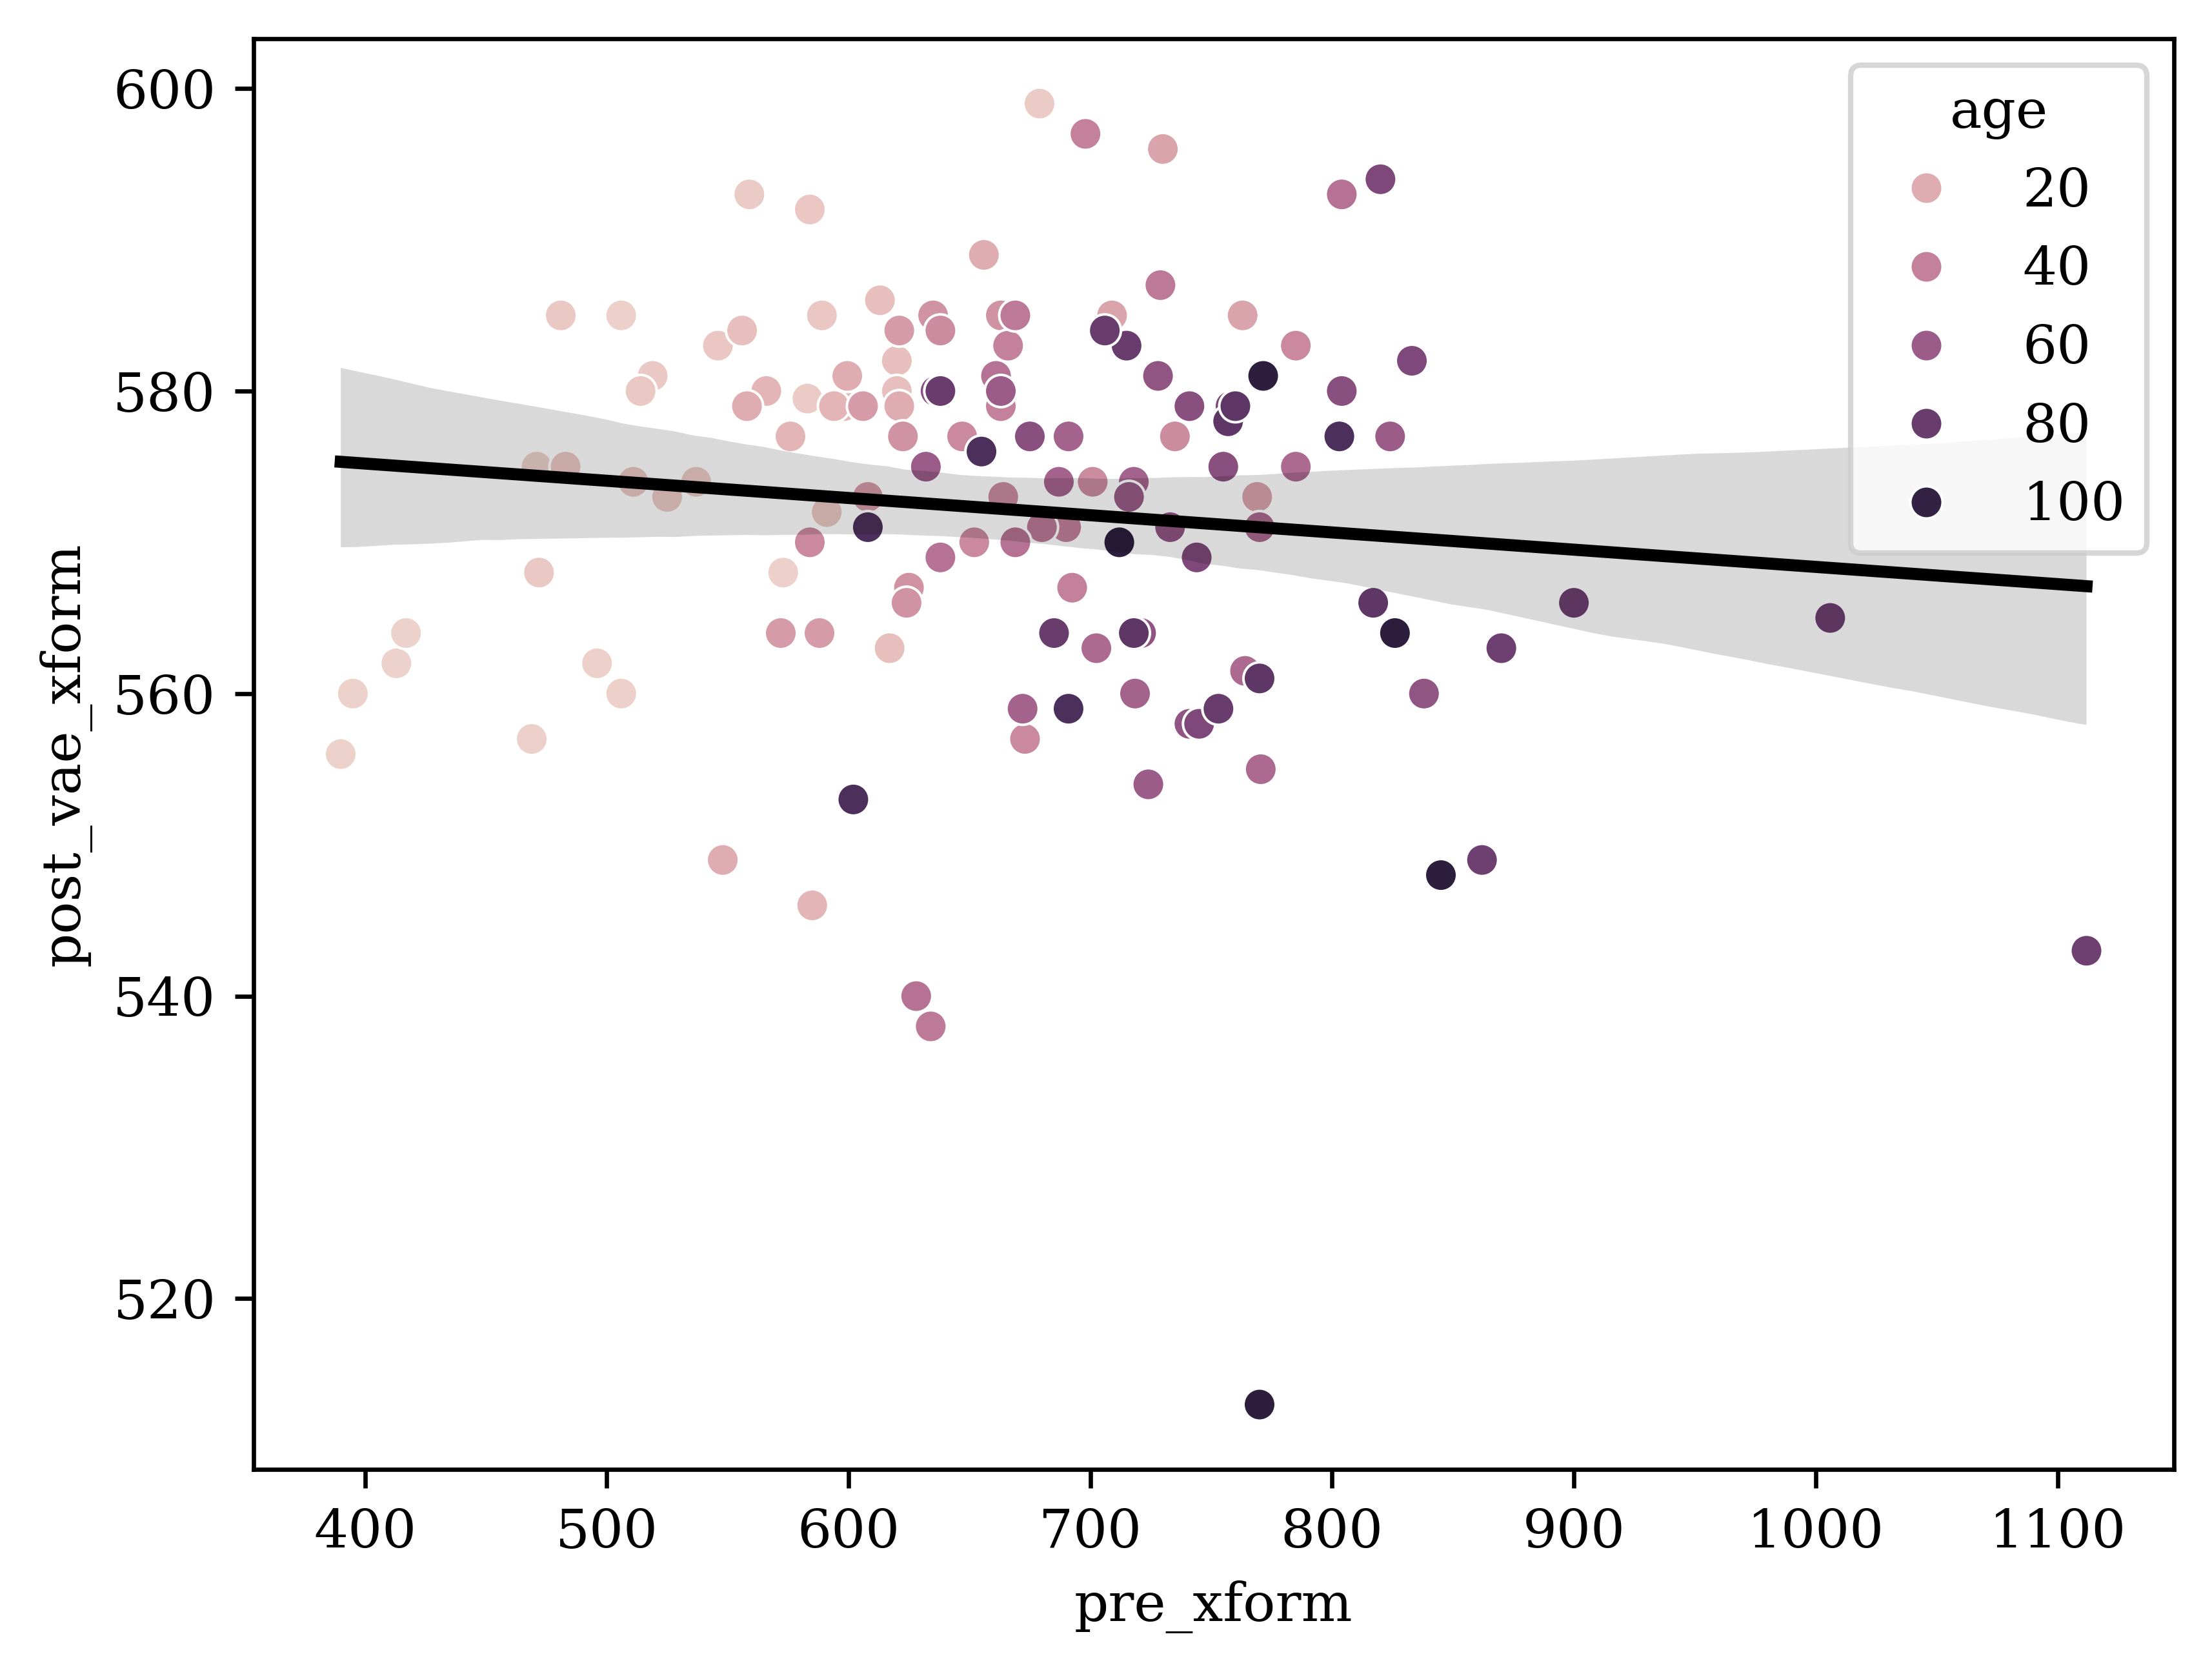

In [60]:
sns.scatterplot(data=filt_df, x="pre_xform", y="post_vae_xform", hue="age")
sns.regplot(data=filt_df, x="pre_xform", y="post_vae_xform", scatter=False, color='k')

<Axes: xlabel='pre_xform', ylabel='post_ae_xform'>

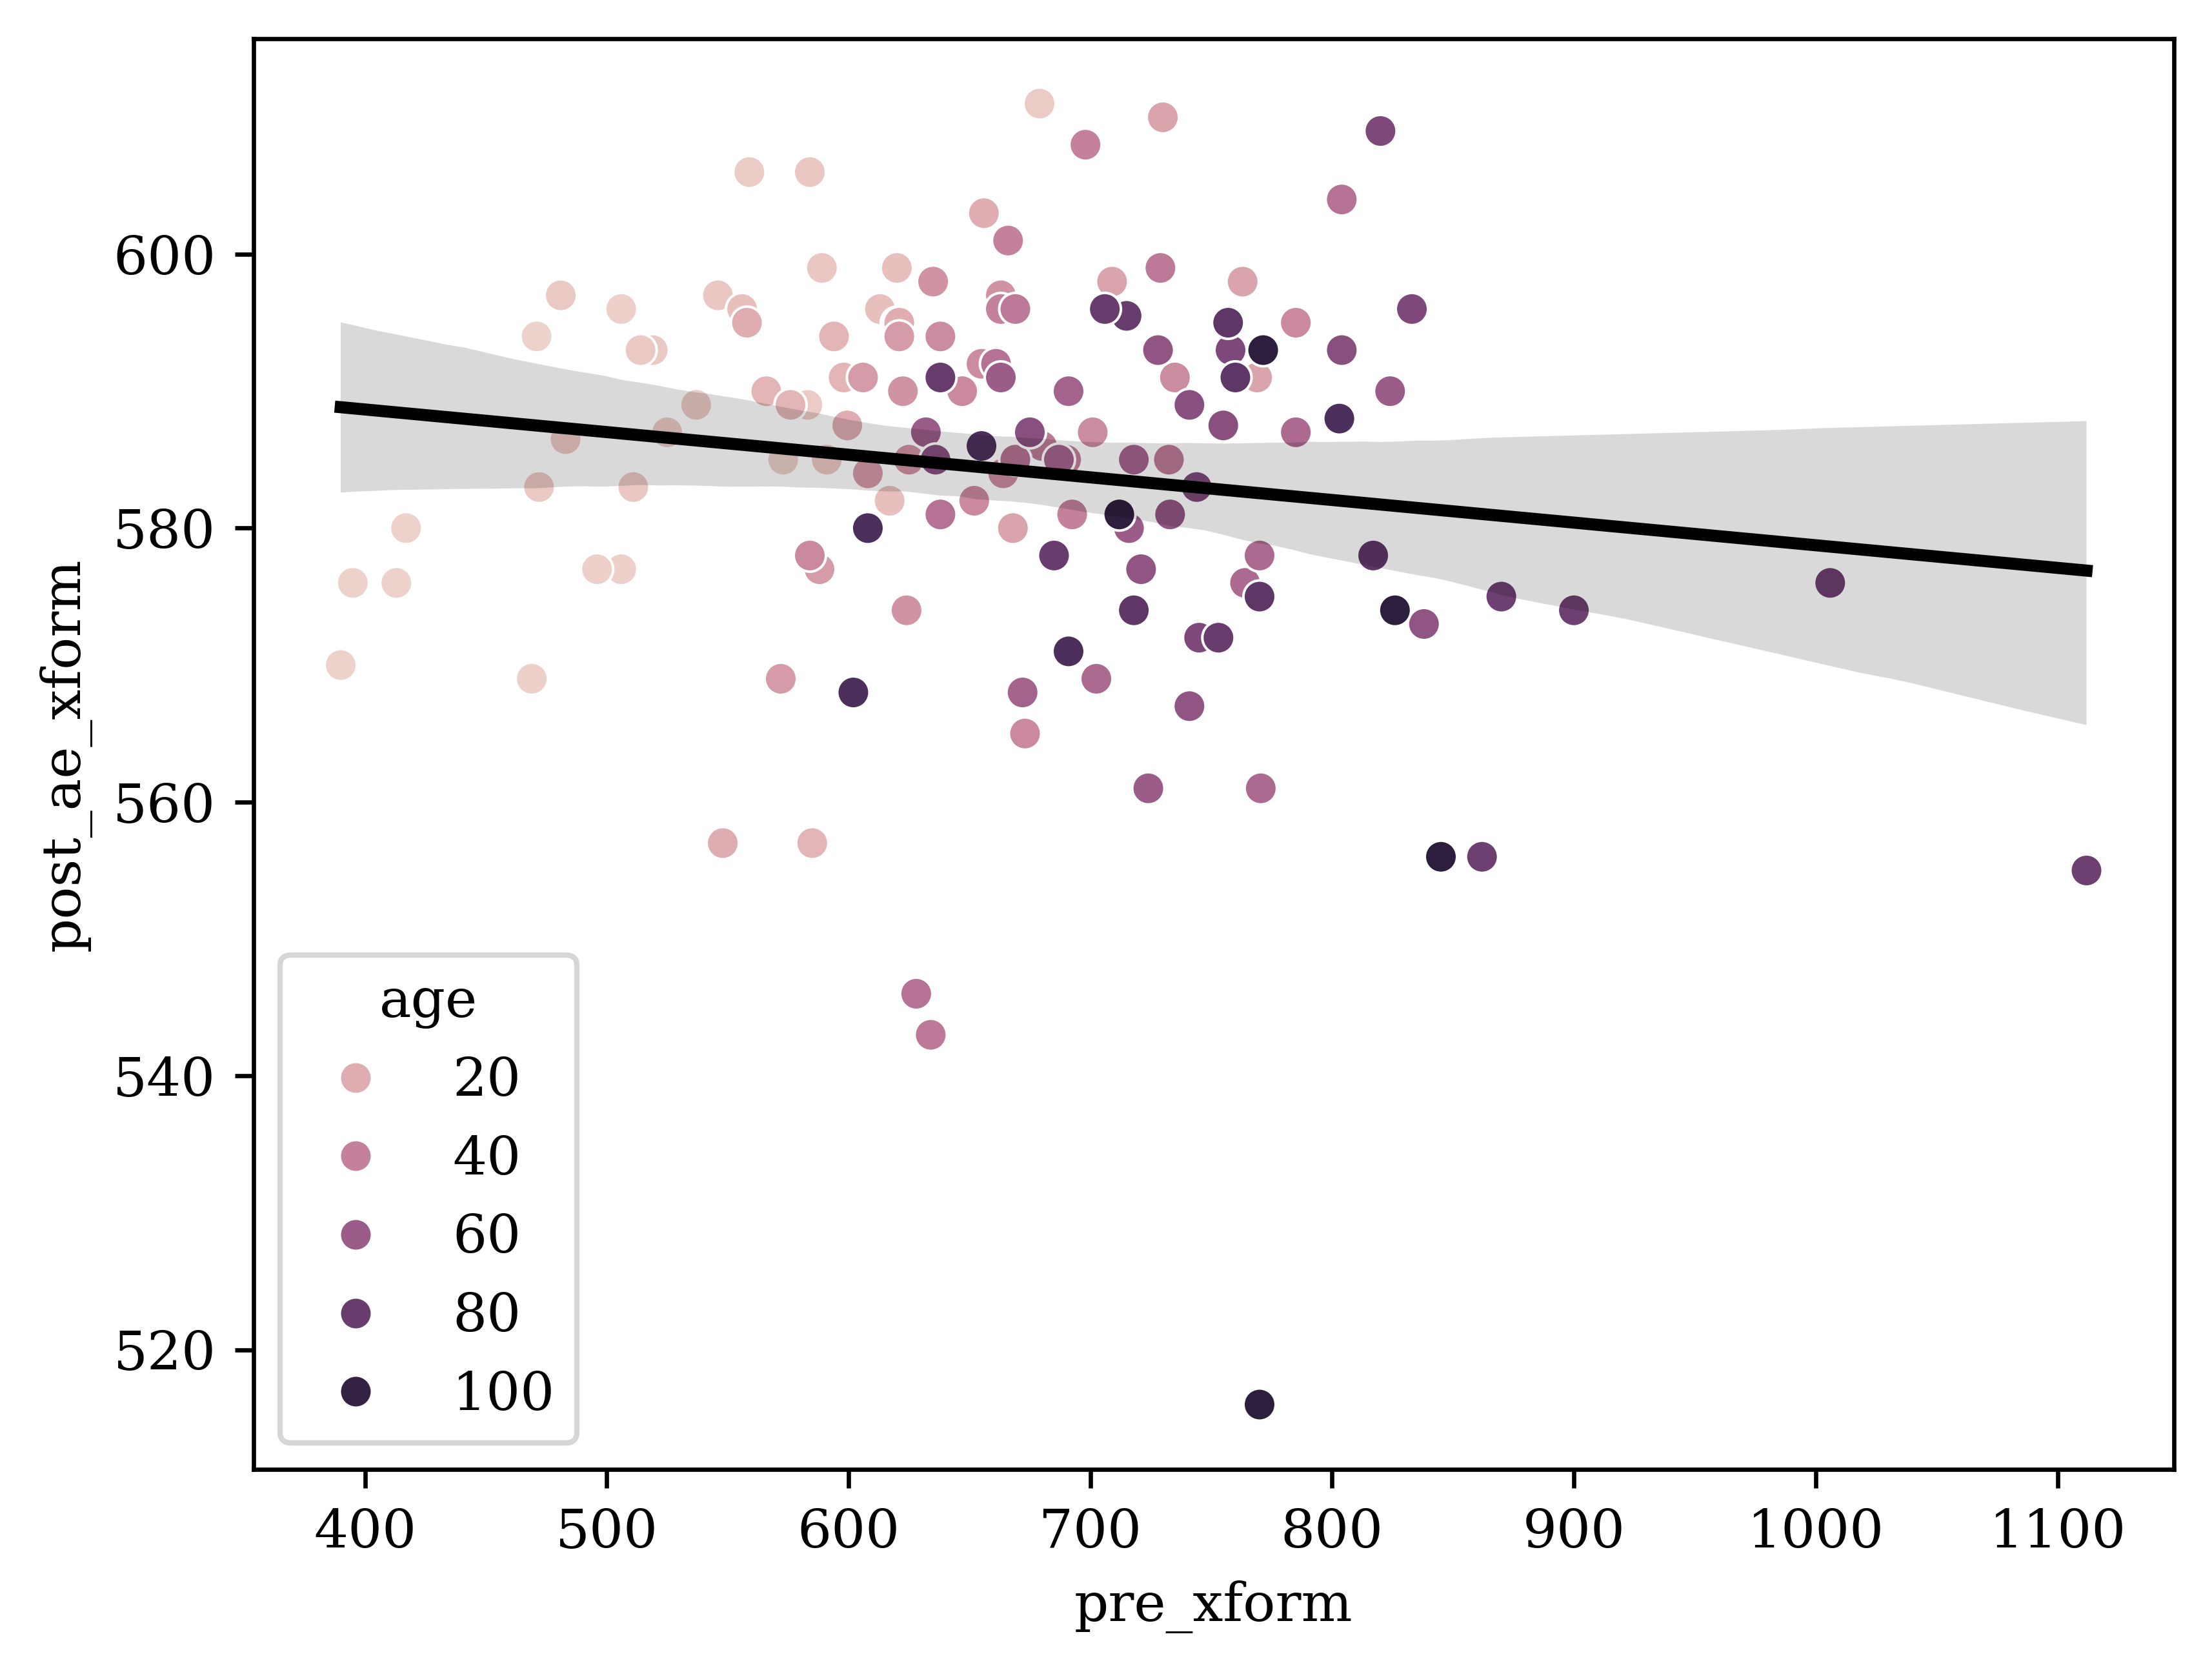

In [61]:
sns.scatterplot(data=filt_df, x="pre_xform", y="post_ae_xform", hue="age")
sns.regplot(data=filt_df, x="pre_xform", y="post_ae_xform", scatter=False, color='k')

In [72]:
filt_df = size_df.query('age > 3 & age < 103')

In [73]:
filt_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr().iloc[1:, 0]

post_vae_xform   -0.051222
post_ae_xform    -0.084557
Name: pre_xform, dtype: float64

In [74]:
filt_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr(method="spearman").iloc[1:, 0]

post_vae_xform   -0.042937
post_ae_xform    -0.061630
Name: pre_xform, dtype: float64

<Axes: xlabel='pre_xform', ylabel='post_vae_xform'>

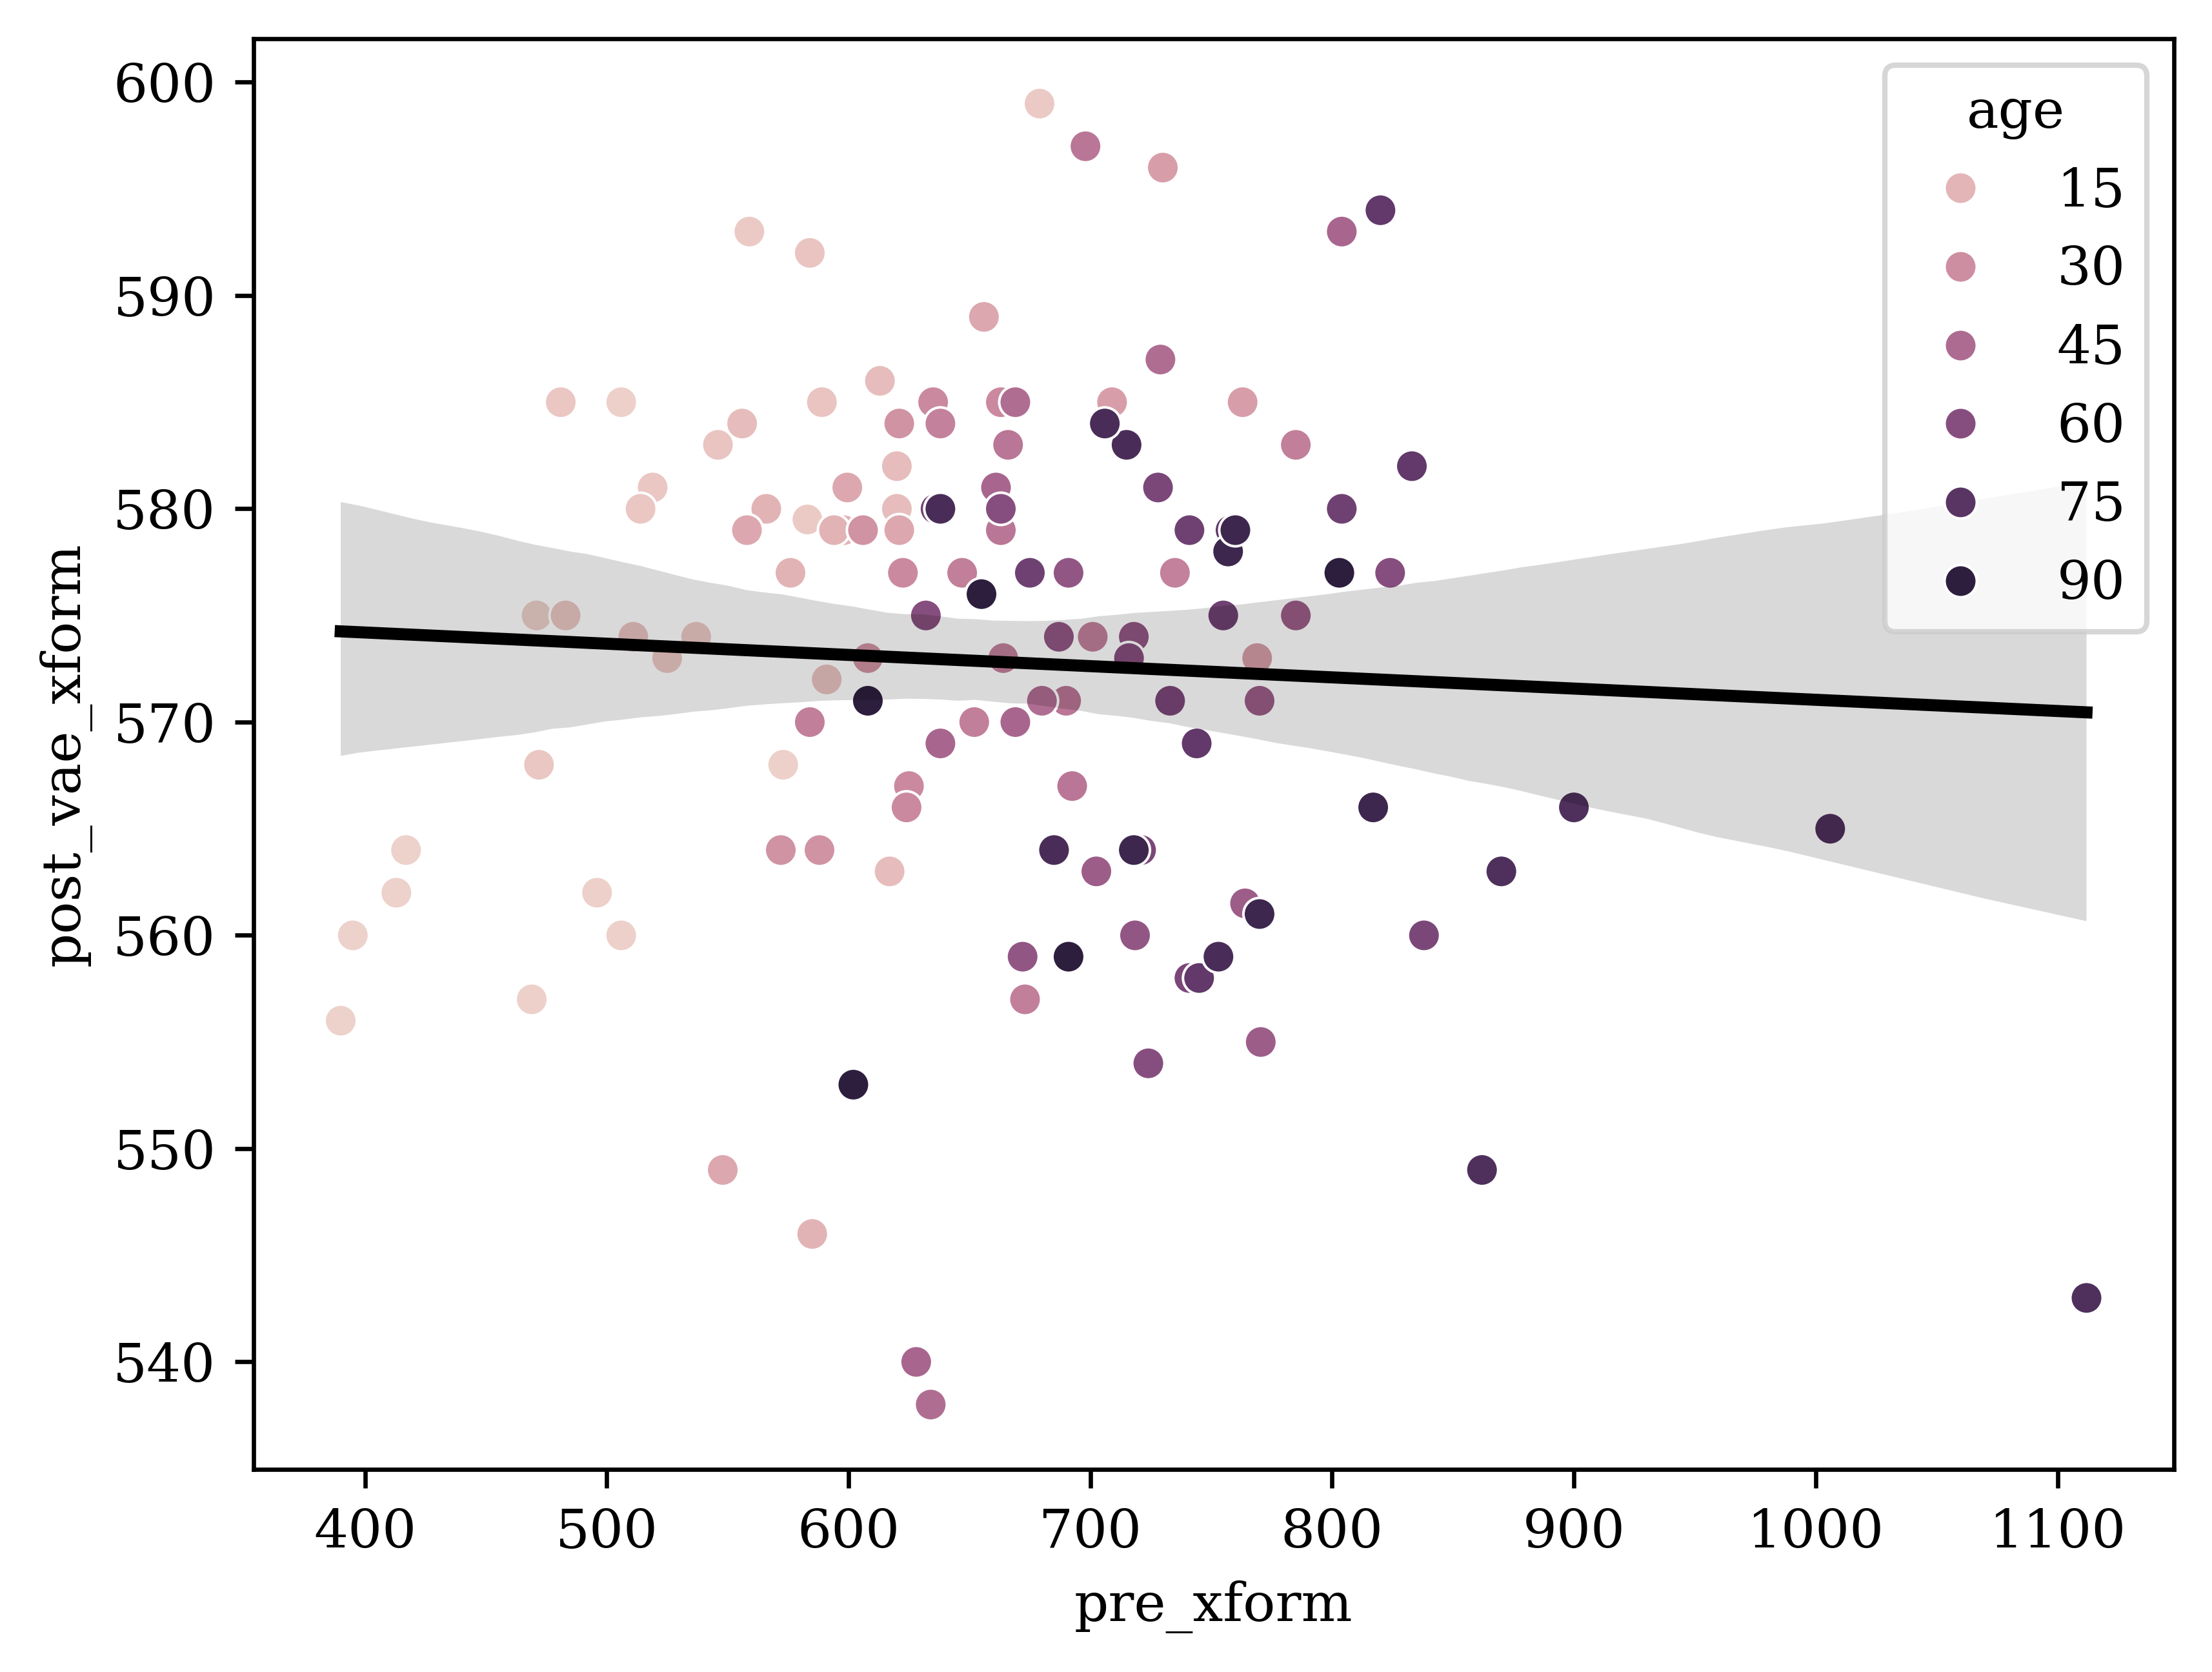

In [75]:
sns.scatterplot(data=filt_df, x="pre_xform", y="post_vae_xform", hue="age")
sns.regplot(data=filt_df, x="pre_xform", y="post_vae_xform", scatter=False, color='k')

In [69]:
filt_df = size_df.query('age > 4')

In [70]:
filt_df[['pre_xform', 'post_vae_xform', 'post_ae_xform']].corr().iloc[1:, 0]

post_vae_xform   -0.184171
post_ae_xform    -0.190444
Name: pre_xform, dtype: float64

<Axes: xlabel='pre_xform', ylabel='post_vae_xform'>

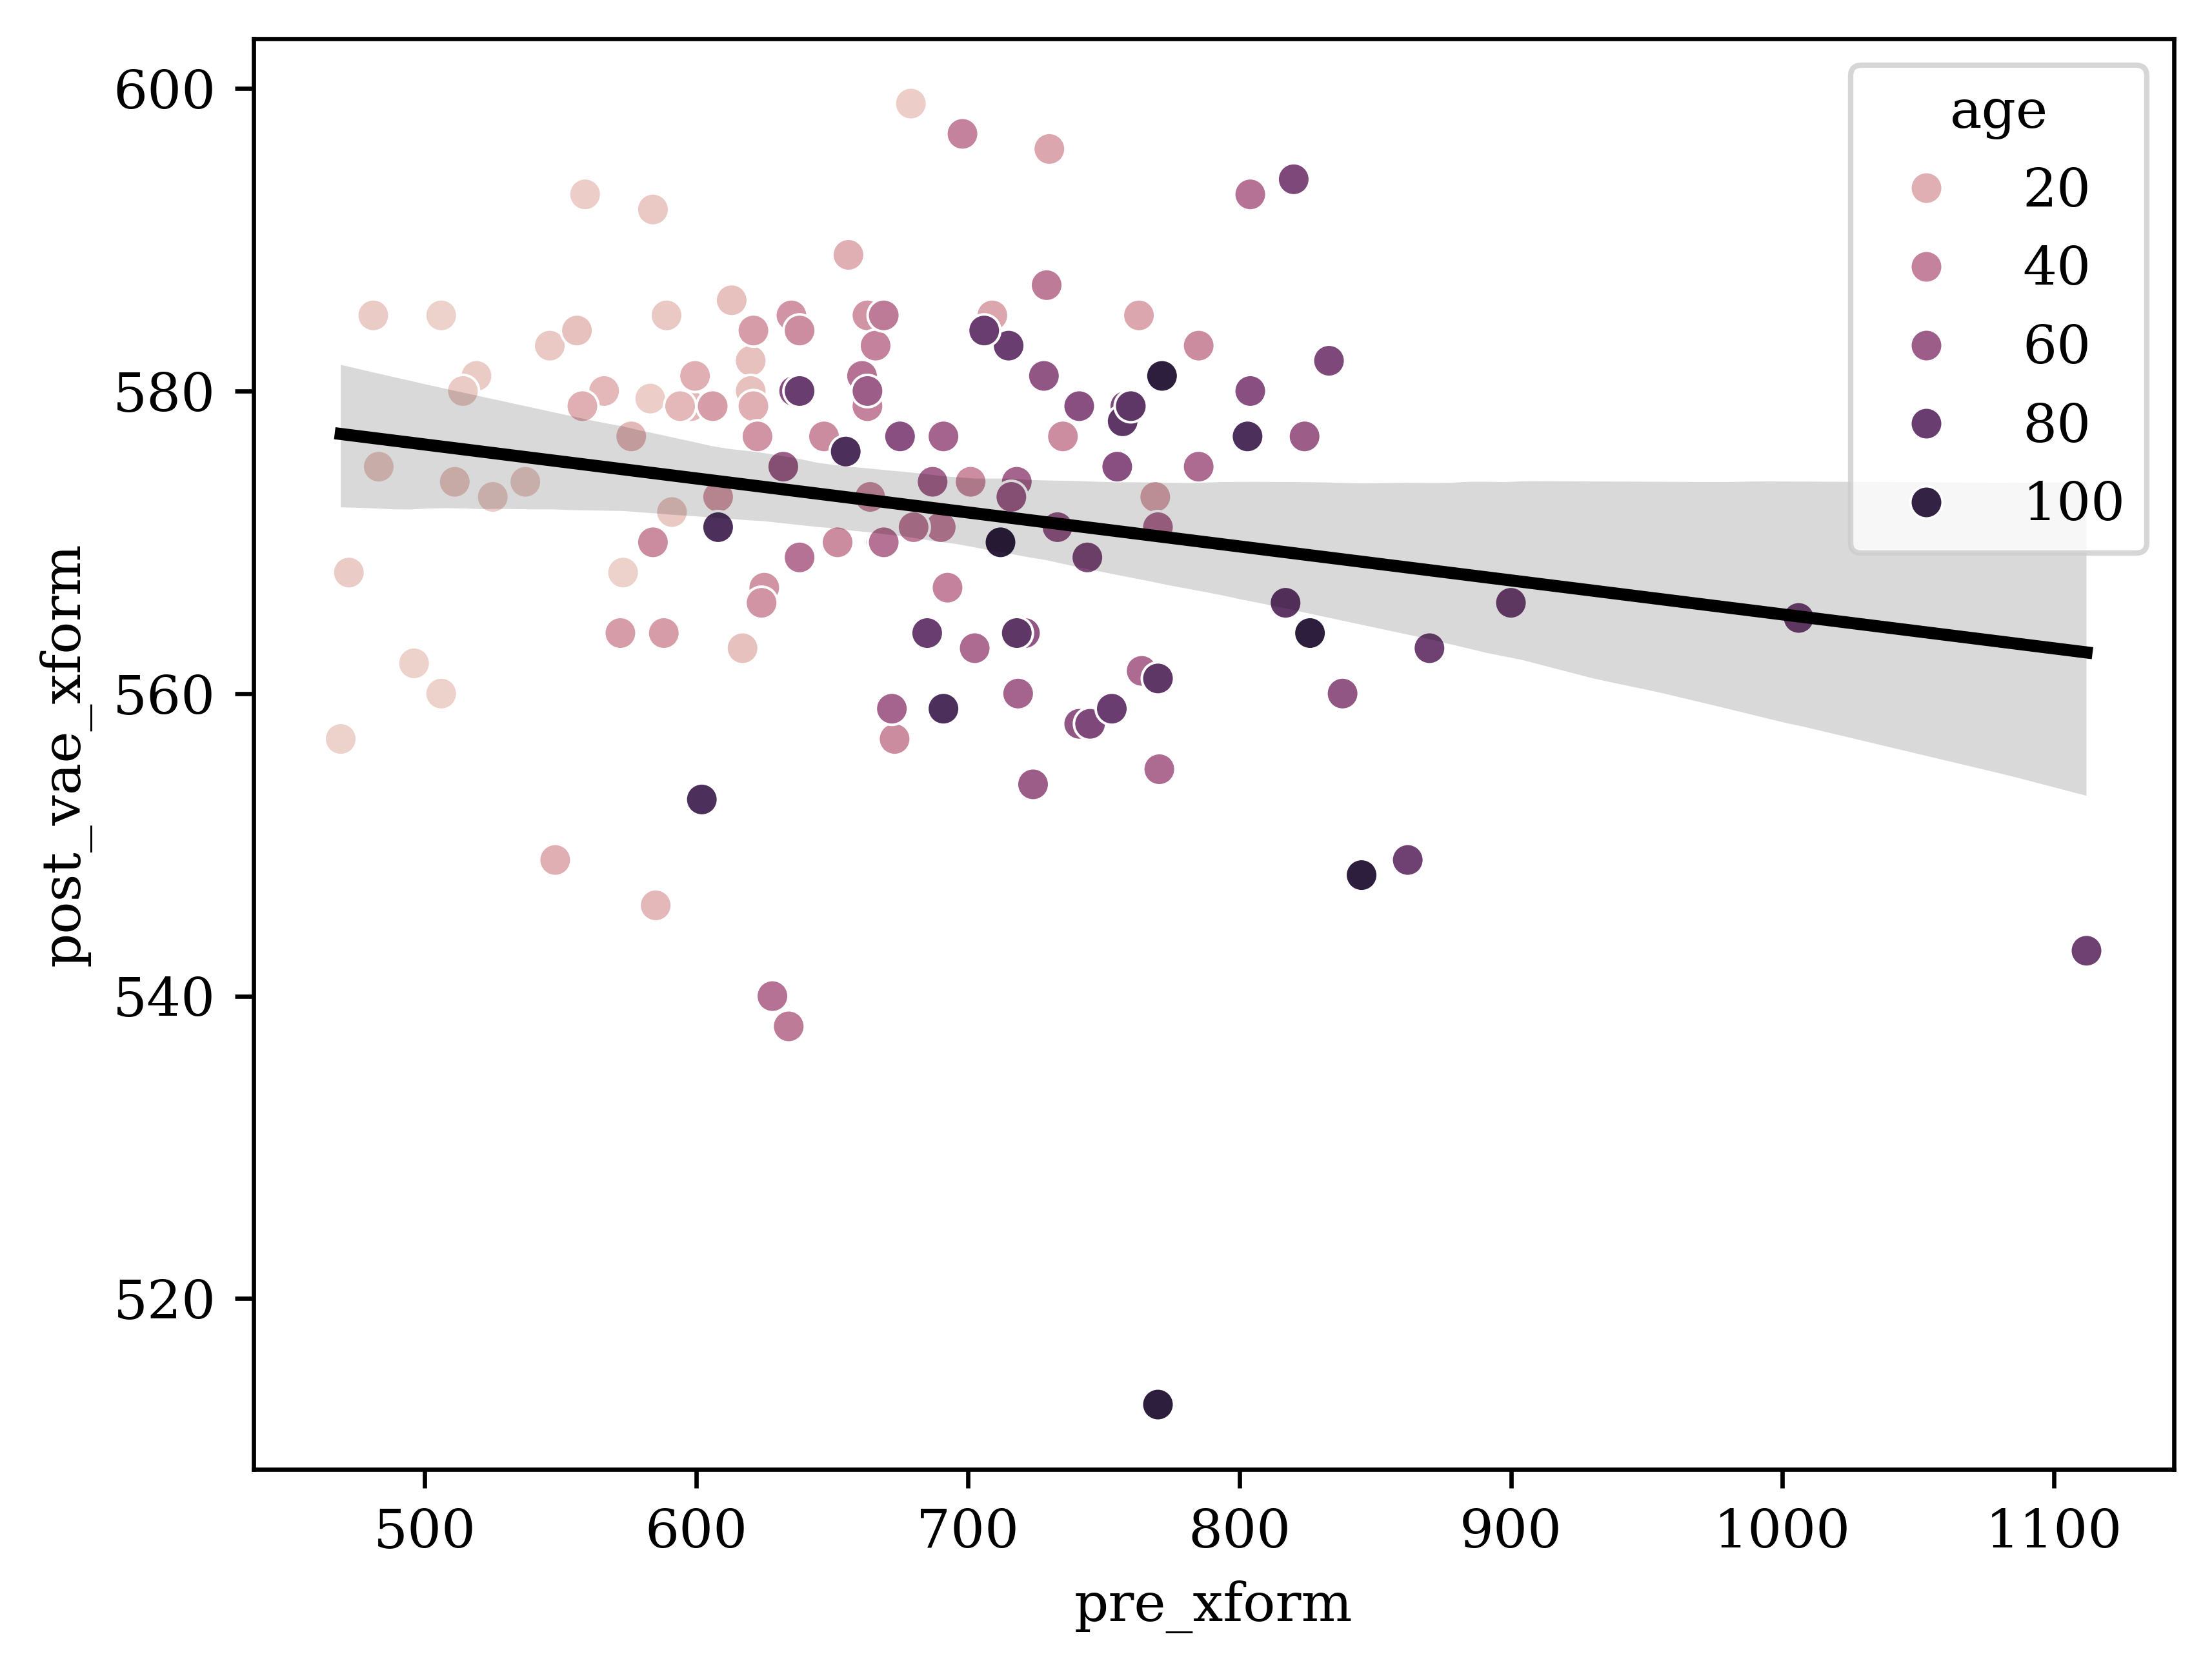

In [71]:
sns.scatterplot(data=filt_df, x="pre_xform", y="post_vae_xform", hue="age")
sns.regplot(data=filt_df, x="pre_xform", y="post_vae_xform", scatter=False, color='k')

In [80]:
from sklearn.decomposition import PCA
from aging.size_norm.util import flatten

In [82]:
_frames = np.concatenate(list(vae_poses.values()), axis=0)
_frames = flatten(_frames).astype('float32')


In [83]:
pca = PCA(n_components=25)
pca.fit(_frames)

PCA(n_components=25)

In [88]:
vae_explained_variance = pca.explained_variance_ratio_.copy()

In [91]:
_frames = np.concatenate(list(ae_poses.values()), axis=0)
_frames = flatten(_frames).astype('float32')

pca = PCA(n_components=25)
pca.fit(_frames)
ae_explained_variance = pca.explained_variance_ratio_.copy()

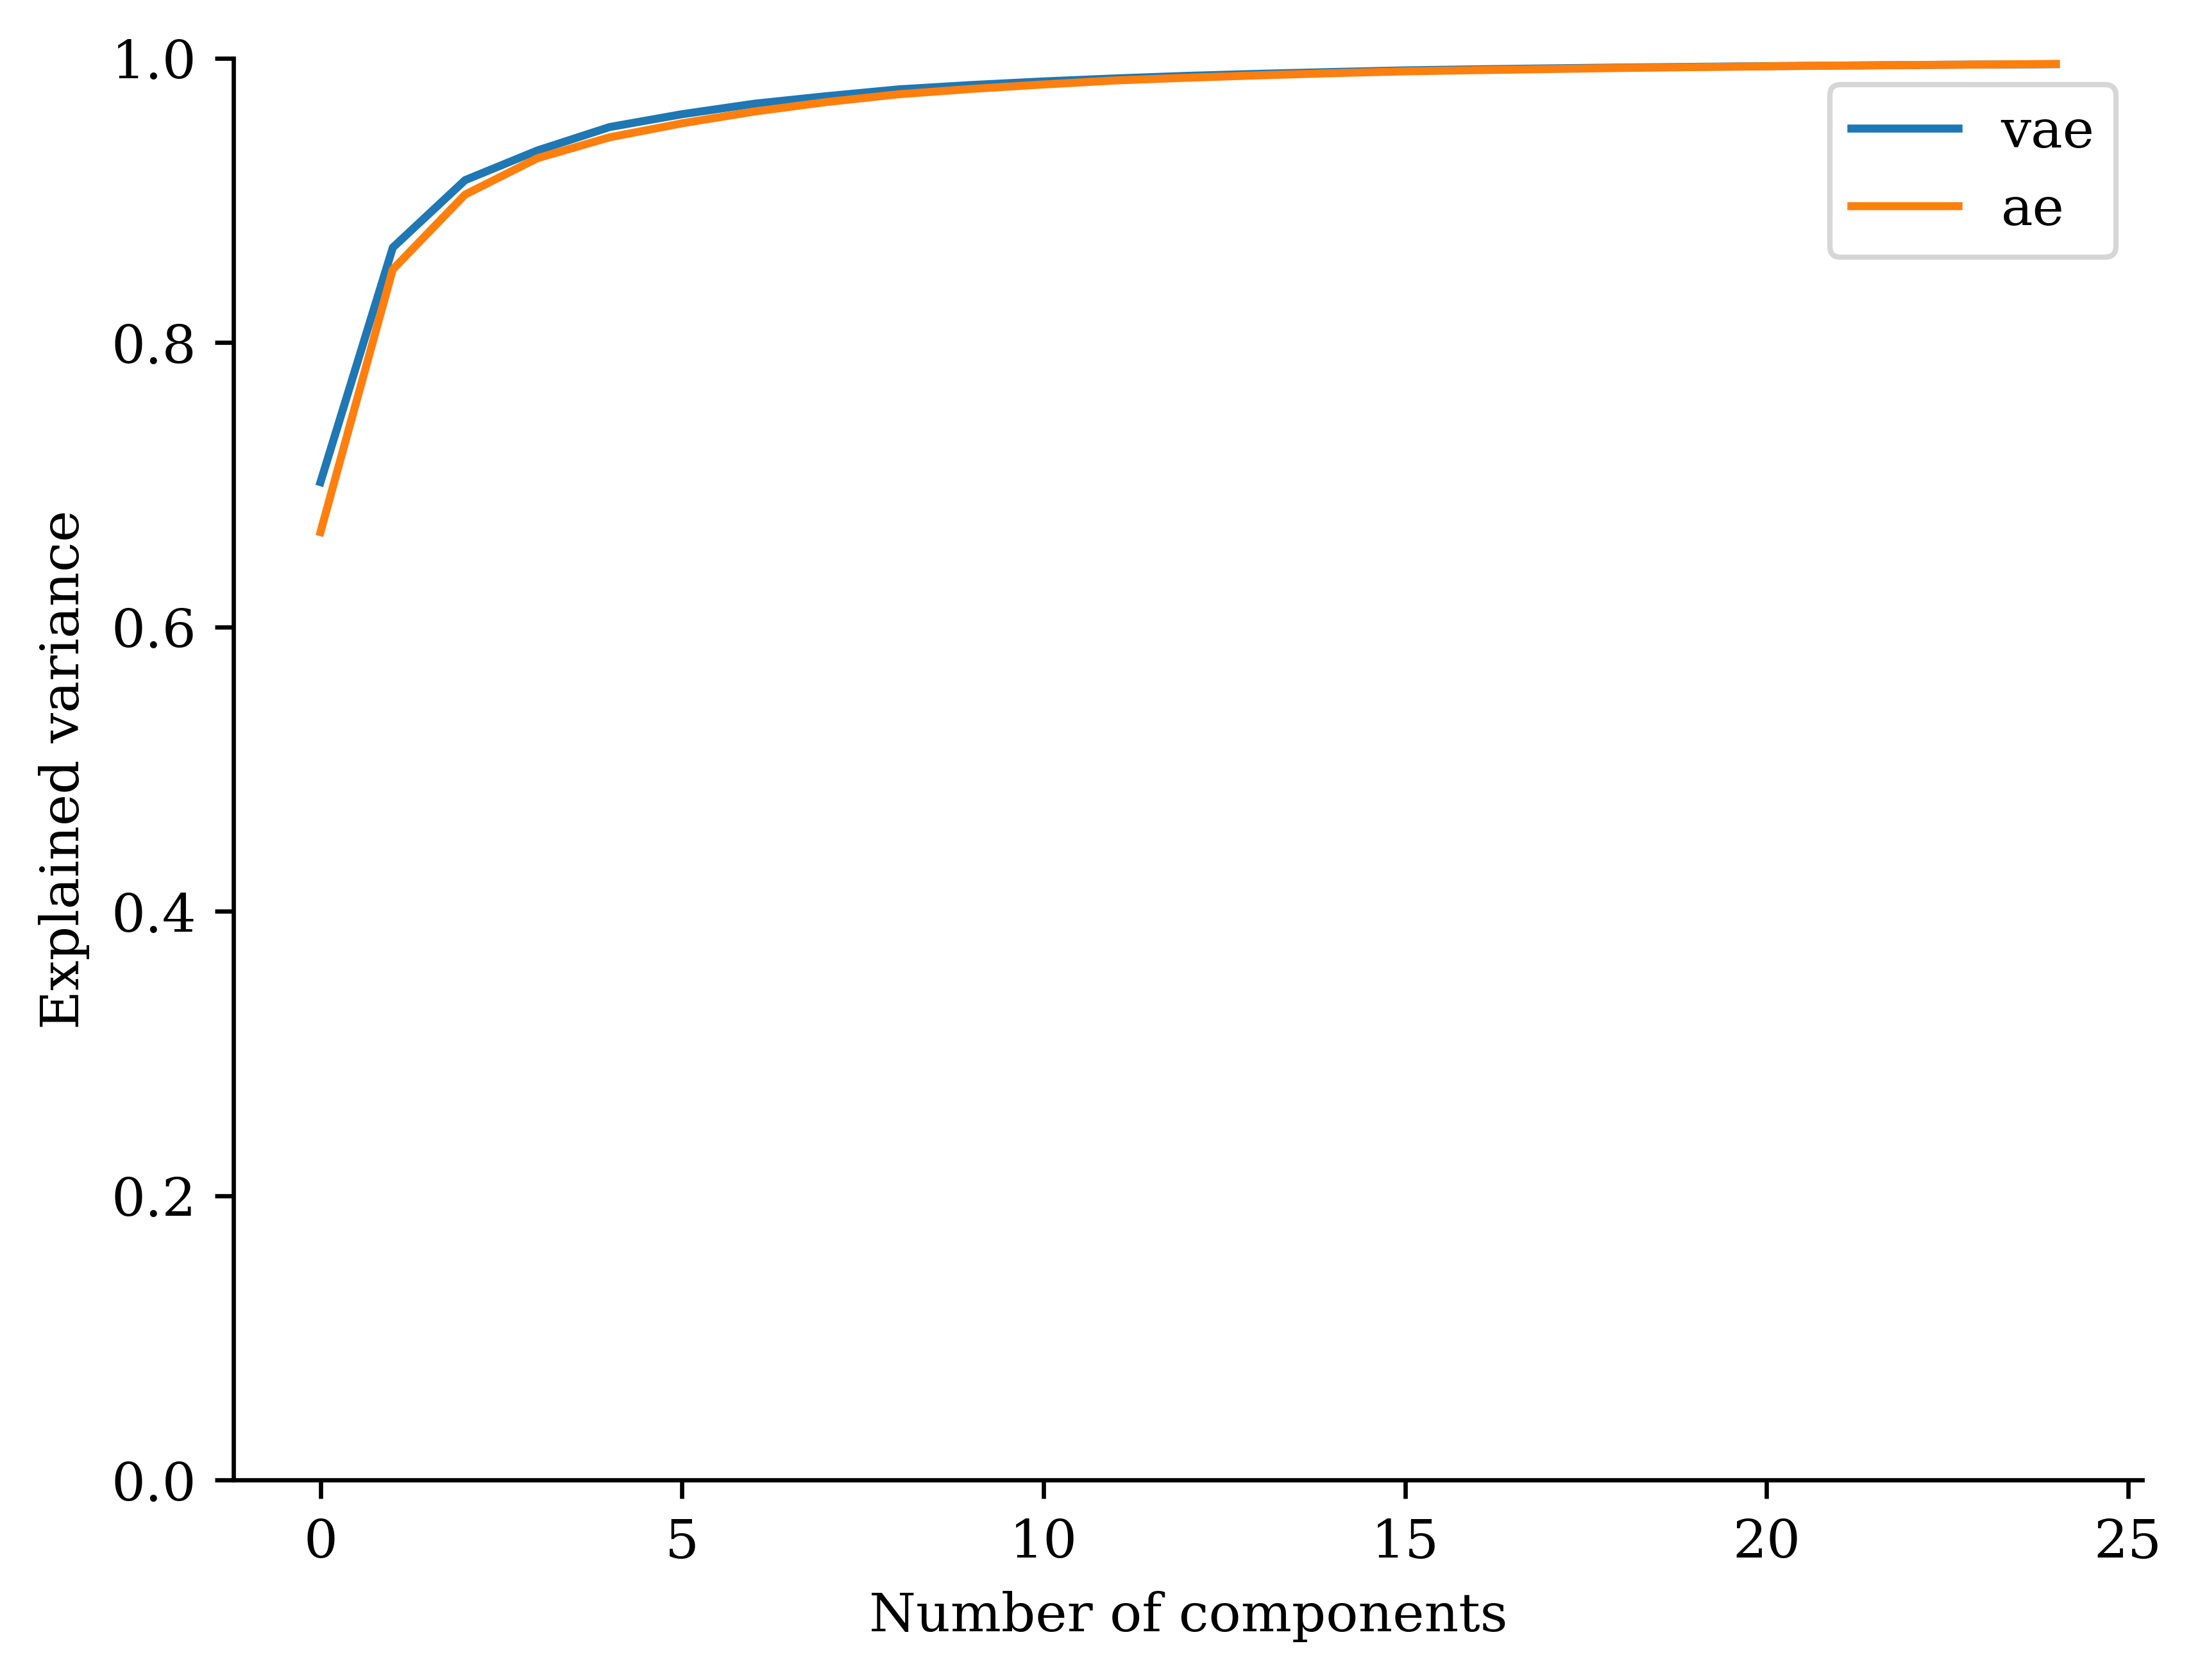

In [95]:
plt.plot(np.cumsum(vae_explained_variance), label="vae")
plt.plot(np.cumsum(ae_explained_variance), label="ae")
plt.ylim(0, 1)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.legend()
sns.despine()